In [ ]:
# 5.12 案例

# 需求

现在我们有一组从2006年到2016年1000部最流行的电影数据

数据来源：https://www.kaggle.com/damianpanek/sunday-eda/data

- 问题1：我们想知道这些电影数据中评分的平均分，导演的人数等信息，我们应该怎么获取？
- 问题2：对于这一组电影数据，如果我们想rating，runtime的分布情况，应该如何呈现数据？
- 问题3：对于这一组电影数据，如果我们希望统计电影分类(genre)的情况，应该如何处理数据？


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("./IMDB-Movie-Data.csv")
df.tail()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


# 实现
## 问题一：

我们想知道这些电影数据中评分的平均分，导演的人数等信息，我们应该怎么获取？ 

In [4]:
# 得出评分的平均分
df['Rating'].mean()

6.723199999999999

In [5]:
# 得出导演人数信息
np.unique(df['Director']).shape[0]

644

## 问题二：

对于这一组电影数据，如果我们想Rating，Runtime (Minutes)的分布情况，应该如何呈现数据？

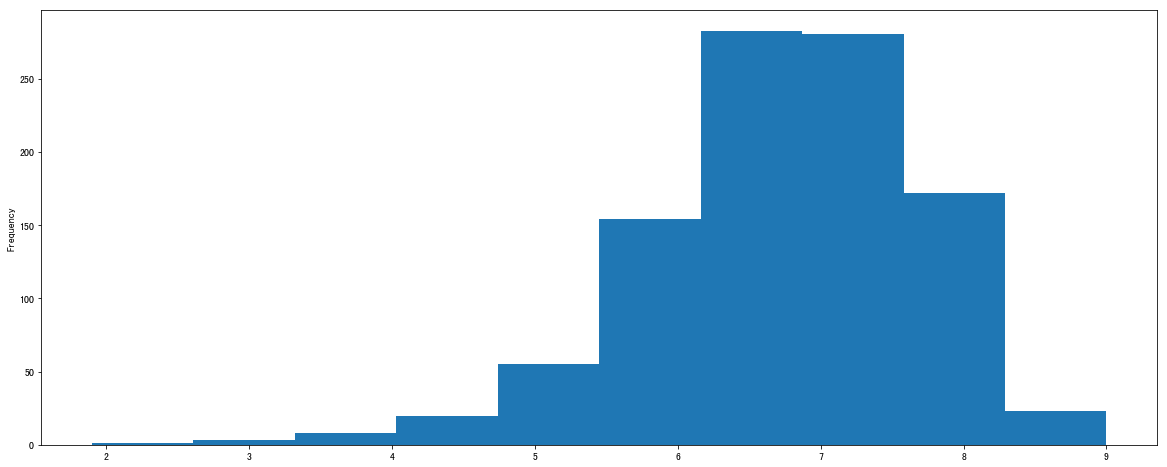

In [8]:
df["Rating"].plot(kind='hist', figsize=(20, 8))

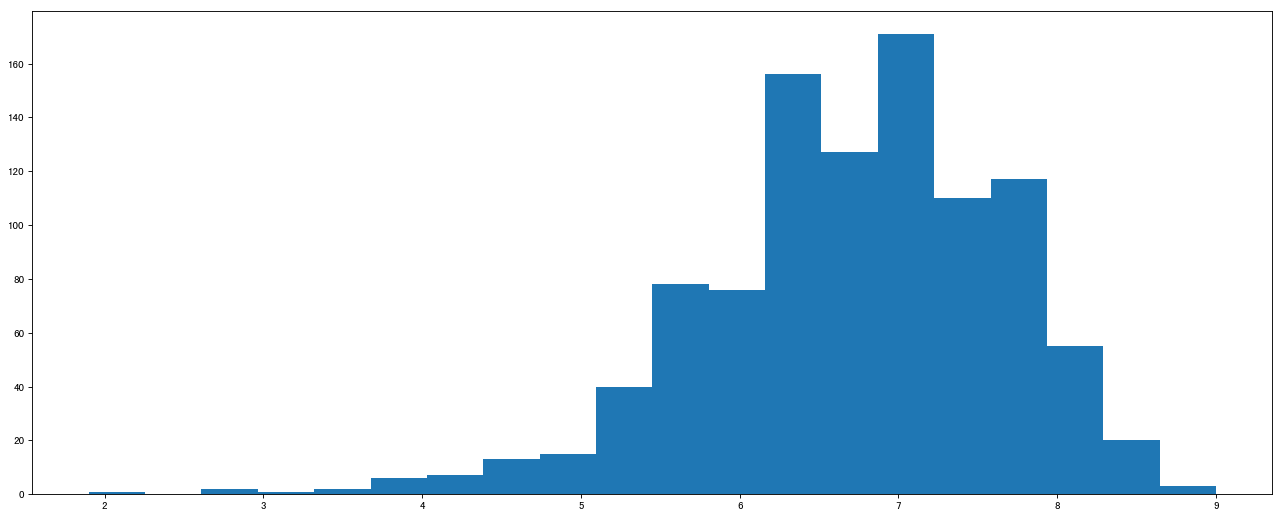

In [9]:
plt.figure(figsize=(20,8),dpi=80)
plt.hist(df["Rating"].values,bins=20)
plt.show()

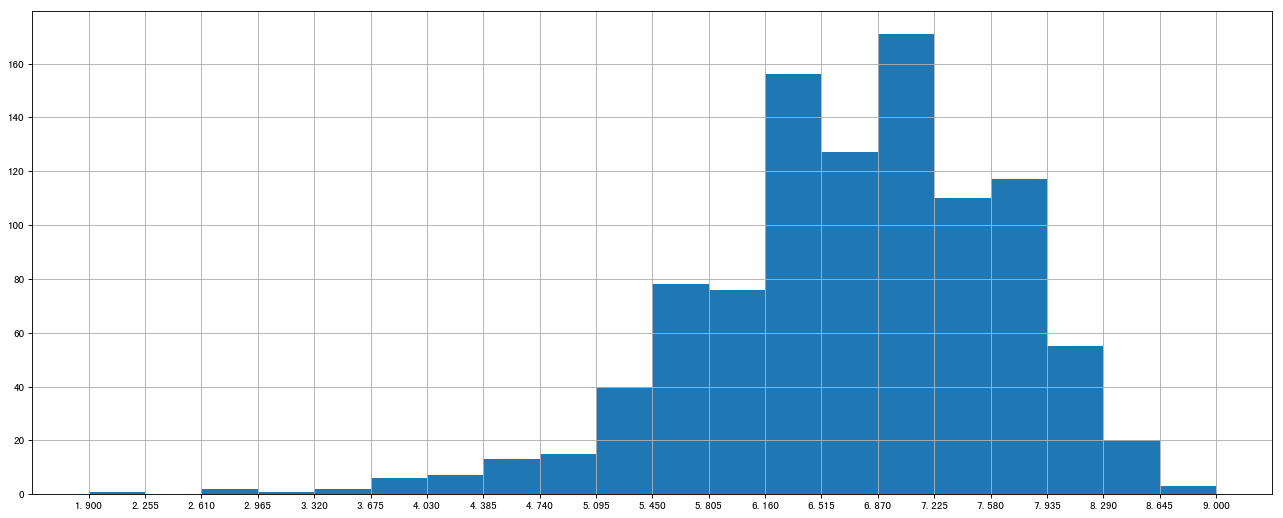

In [19]:
plt.figure(figsize=(20,8),dpi=80)
plt.hist(df["Rating"].values,bins=20)

max_ = df["Rating"].max()
min_ = df["Rating"].min()

t1 = np.linspace(min_,max_,num=21)
plt.xticks(t1)

plt.grid()
plt.show()

## 问题三：

对于这一组电影数据，如果我们希望统计电影分类(genre)的情况，应该如何处理数据？

- 思路分析
    - 思路
        - 1、创建一个全为0的dataframe，列索引置为电影的分类，temp_df
        - 2、遍历每一部电影，temp_df中把分类出现的列的值置为1
        - 3、求和
- 1、创建一个全为0的dataframe，列索引置为电影的分类，temp_df


In [3]:
df['Genre'].head()

0     Action,Adventure,Sci-Fi
1    Adventure,Mystery,Sci-Fi
2             Horror,Thriller
3     Animation,Comedy,Family
4    Action,Adventure,Fantasy
Name: Genre, dtype: object

In [5]:
# 进行字符串分割
temp_list = [i.split(",") for i in df["Genre"]]

AttributeError: 'list' object has no attribute 'head'

In [8]:
# 获取电影的分类
genre_list = np.unique([j for i in temp_list for j in i])
genre_list

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western'], dtype='<U9')

In [11]:
# 以电影总数为行，所有分类数为列新建一个df，columns=设置列名为电影类别名
temp_df = pd.DataFrame(np.zeros([df.shape[0],genre_list.shape[0]]),
                       columns=genre_list)
temp_df.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df.shape[0]

1000

In [14]:
for i in range(df.shape[0]):
     #temp_list[i] ['Action','Adventure','Animation']
    temp_df.ix[i,temp_list[i]]=1 # ix混合索引，利用列名相同定位（神！！！）
'''
对于sum之类的统计函数，坐标轴还是按照默认列“columns” (axis=0, default)
，如果要对行“index” 需要指定(axis=1)
'''
print(temp_df.sum().sort_values()) 

Action       303.0
Adventure    259.0
Animation     49.0
Biography     81.0
Comedy       279.0
Crime        150.0
Drama        513.0
Family        51.0
Fantasy      101.0
History       29.0
Horror       119.0
Music         16.0
Musical        5.0
Mystery      106.0
Romance      141.0
Sci-Fi       120.0
Sport         18.0
Thriller     195.0
War           13.0
Western        7.0
dtype: float64


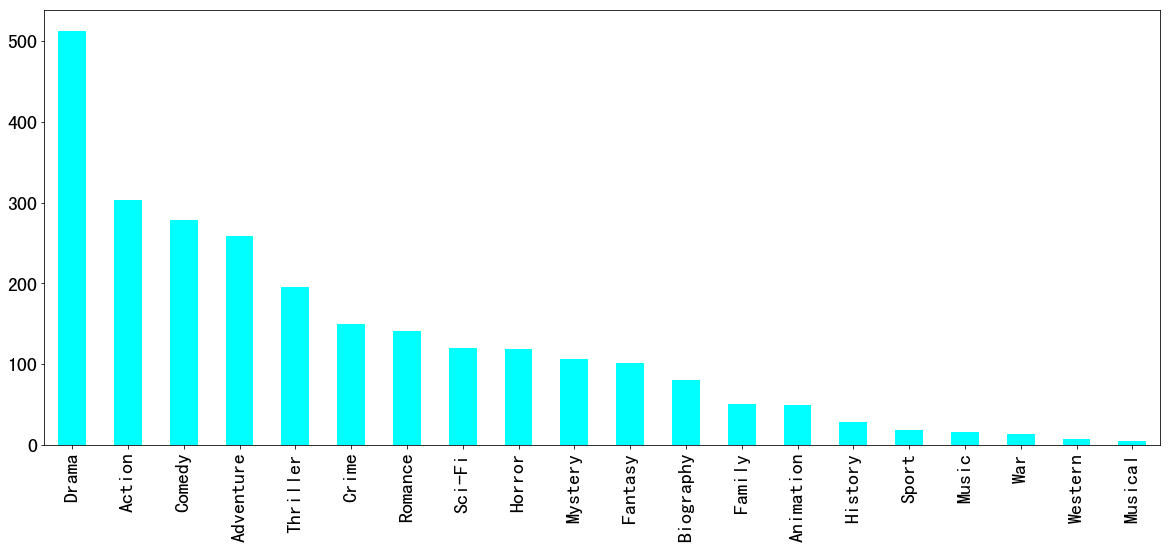

In [16]:
# 绘图
temp_df.sum().sort_values(ascending=False).plot(kind="bar",
                                                figsize=(20,8),
                                               fontsize=20,
                                               colormap="cool")